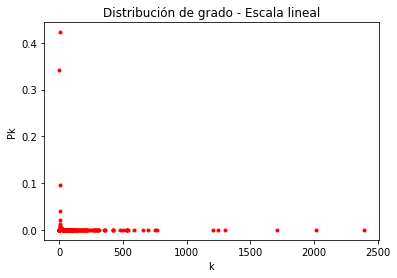

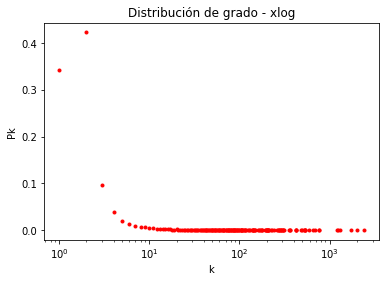

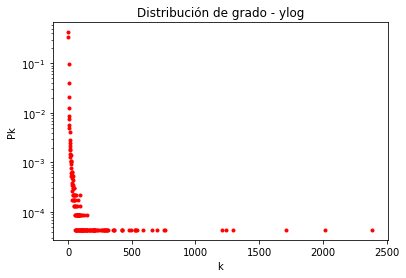

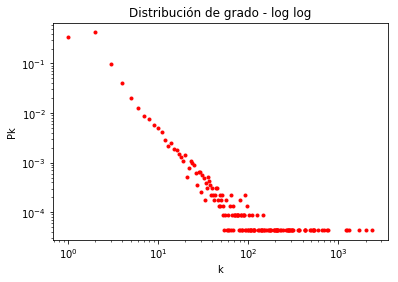

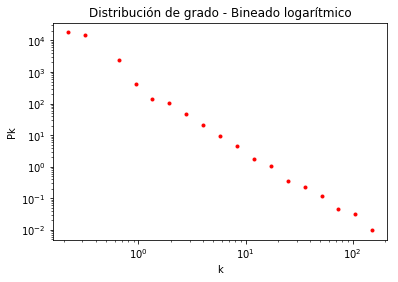

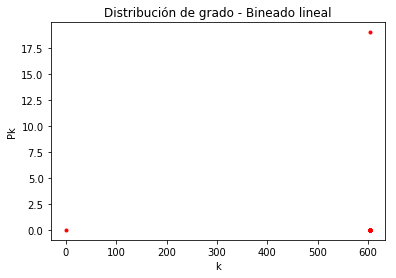

In [36]:
#EJERCICIO 3.A
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

g = nx.read_gml('as-22july06.gml')

#Creo lista de nodos
nodos=[] 
for nodo in g.nodes:
    nodos.append(nodo)

#Creo lista con vecinos correspondientes a cada nodo
vecinos_de_nodos=[]
for nodo in g.nodes:
    vecinos=[]
    for vecino in g.neighbors(nodo):
        vecinos.append(vecino)
    vecinos_de_nodos.append(vecinos)

#Calculo el grado de cada nodo y hago una lista [nodo,grado]
nodo_grado=[]
grados_existentes=[]
for n,i in zip(nodos,vecinos_de_nodos):
    l=len(i) #la longitud de la sublista i de vecinos_de_nodos es el grado del nodo correspondiente a esos vecinos
    nodo_grado.append([n,l])
    grados_existentes.append(l)

#Hago una lista de los grados existentes
grados_existentes=list(set(grados_existentes))

#Hago una lista con el grado y el numero de nodos con dicho grado
grado_nronodos=[]
NroNodos=[]
for grado in grados_existentes:
    nronodos=[]
    for i in nodo_grado:
        if i[1]==grado:
            nronodos.append(i[0])
    Pk=len(nronodos)
    NroNodos.append(Pk)
    
for g,n in zip(grados_existentes,NroNodos):
    grado_nronodos.append([g,n])
    
#Creo vectores de grado y de probabilidad de grado Pk=N_i/N
M=len(NroNodos)
N=len(nodos)
K=np.zeros(N)
Pk=np.zeros(N)
t=-1
for i in range(M):
    t=t+1
    K[t]=grado_nronodos[i][0]
    Pk[t]=grado_nronodos[i][1]/N

plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.title("Distribución de grado - Escala lineal")
plt.show()

plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.xscale('log')
plt.title("Distribución de grado - xlog")
plt.show()


plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.yscale('log')
plt.title("Distribución de grado - ylog")
plt.show()


plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.xscale('log')
plt.yscale('log')
plt.title("Distribución de grado - log log")
plt.show()

#-----------------------------------------------------3.A-BINEADOS----------------------------------------------------------------------
#BINEADO LOGARITMICO

#Creo al vector Kn con los grados correspondientes a cada nodo
Kn=np.zeros(len(nodo_grado))
t=-1
for i in range(len(nodo_grado)):
    t=t+1
    Kn[t]=nodo_grado[i][1]

# bins escalados logaritmicamente
bins = np.logspace(0, 3, 20)
widths = (bins[1:] - bins[:-1])

# Calculo histograma
hist = np.histogram(Kn, bins=bins)
# normalizo el ancho del bin
hist_norm = hist[0]/widths

kb=np.zeros(len(bins))
Pkm=np.zeros(len(bins))
for i in range(len(bins)-1):
    kb[i]=(bins[i+1]-bins[i])/2
    Pkm[i]=hist_norm[i]

plt.plot(kb,Pkm,'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.xscale('log')
plt.yscale('log')
plt.title("Distribución de grado - Bineado logarítmico")
plt.show()

#BINEADO LINEAL
plt.hist(Kn, )

# bins escalados logaritmicamente
bins = np.linspace(0, N, 20)
widths = (bins[1:] - bins[:-1])

# Calculo histograma
hist = np.histogram(Kn, bins=bins)
# normalizo el ancho del bin
hist_norm = hist[0]/widths

kb=np.zeros(len(bins))
Pkm=np.zeros(len(bins))
for i in range(len(bins)-1):
    kb[i]=(bins[i+1]-bins[i])/2
    Pkm[i]=hist_norm[i]
    
plt.plot(kb,Pkm,'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.title("Distribución de grado - Bineado lineal")
plt.show()


In [38]:
r = np.random.normal(loc=5, scale=3, size=10)
r

array([ 9.40401554,  7.71871434,  7.65976267,  4.38952595, -0.18188205,
        1.91891246,  9.56174296,  5.99813187,  9.20470678,  0.9166034 ])